In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('../data.csv',index_col=False)
# df.to_csv('../data.csv')
df.info

<bound method DataFrame.info of        Unnamed: 0.1  Unnamed: 0  index  CNTRYID  CNT  NatCen  STRATUM   
0                 0           0  11956    152.0  CHL   15200  CHL0206  \
1                 1           1  11958    152.0  CHL   15200  CHL0414   
2                 2           2  11960    152.0  CHL   15200  CHL0308   
3                 3           3  11961    152.0  CHL   15200  CHL0414   
4                 4           4  11965    152.0  CHL   15200  CHL0308   
...             ...         ...    ...      ...  ...     ...      ...   
42171         42171       42171  89401    724.0  ESP   72400  ESP1020   
42172         42172       42172  89402    724.0  ESP   72400  ESP9015   
42173         42173       42173  89403    724.0  ESP   72400  ESP9029   
42174         42174       42174  89405    724.0  ESP   72400  ESP0509   
42175         42175       42175  89406    724.0  ESP   72400  ESP9003   

       SUBNATIO  OECD  ADMINMODE  ...  EMOSUPP  PQSCHOOL  PASCHPOL  PRESUPP   
0       1520

In [65]:
df.drop(['CNT'], axis=1)
df['NatCen'] - df['CNTRYID']


0        15048.0
1        15048.0
2        15048.0
3        15048.0
4        15048.0
          ...   
42171    71676.0
42172    71676.0
42173    71676.0
42174    71676.0
42175    71676.0
Length: 42176, dtype: float64

<Axes: xlabel='REPEAT', ylabel='ST127Q02TA'>

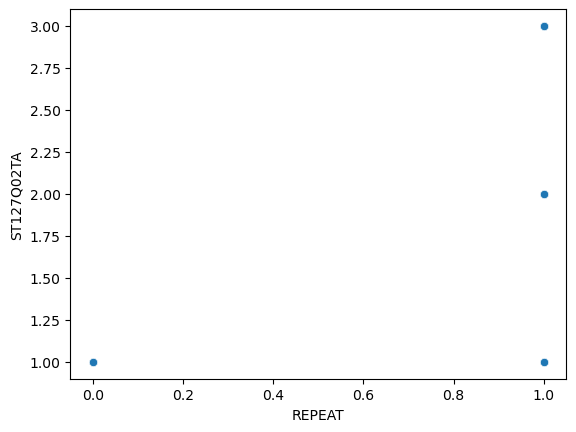

In [91]:
# correlation = df['REPEAT'].corr(df['ST127Q02TA'])
# correlation
# df['ST003D03T']

# sns.scatterplot(df, x = 'REPEAT', y ='ST127Q02TA' )

# for  in list(df):
#     print